# Select the dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
import io

data = files.upload()


Saving Breast_cancer_data.csv to Breast_cancer_data (2).csv


In [ ]:
data=pd.read_csv(io.StringIO(data["Breast_cancer_data.csv"].decode('utf-8')))

data.head(10)
'''all the features are quantitative, meaning that they represent
numerical values that can be measured and compared.
The diagnosis variable of the dataset is binary, with a value of 0 representing
 a benign tumor and a value of 1 representing a malignant tumor.'''

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Cleaning the data and Removing the outliers

In [ ]:
#Cleaning the data
print(data.shape)
data = data.dropna()  #Return a new Data Frame with no empty cells
data.drop_duplicates(inplace = True)   #Removing Duplicates
print(data.shape)

''''We note that the size of the data has not changed,
which means that there was no missing values or duplicates'''

(569, 6)
(569, 6)


"'We note that the size of the data has not changed,\nwhich means that there was no missing values or duplicates"

In [ ]:
# Removing the outliers from mean_radius
for feature in data.columns:
    up_limit = data[feature].mean() + 3 * data[feature].std()
    low_limit = data[feature].mean() - 3 * data[feature].std()
    outliers = data[(data[feature] > up_limit) | (data[feature] < low_limit)]
    data = data[(data[feature] < up_limit) & (data[feature] > low_limit)]
print("Shape after removing outliers from mean_radius:",data.shape)

Shape after removing outliers from mean_radius: (549, 6)


# Measures of Central Tendency

In [ ]:
'''There are three common measures of central
tendency: mean, median, and mode.'''
#  mean
means = data.mean()

#  median
medians = data.median()

#  mode
modes = data.mode().iloc[0]

# Print the means, medians, and modes for each feature in our dataset
for column in data.columns:
    print("column:", column)
    print("Mean:", means[column])
    print("Median:", medians[column])
    print("Mode:", modes[column])

column: mean_radius
Mean: 13.905612021857925
Median: 13.27
Mode: 12.34
column: mean_texture
Mean: 19.11253187613843
Median: 18.75
Mode: 14.93
column: mean_perimeter
Mean: 90.40744990892533
Median: 85.84
Mode: 82.61
column: mean_area
Mean: 628.0520947176685
Median: 542.9
Mode: 512.2
column: mean_smoothness
Mean: 0.09593706739526411
Median: 0.09566
Mode: 0.1007
column: diagnosis
Mean: 0.644808743169399
Median: 1.0
Mode: 1.0


# Measures of Dispersion

In [ ]:
'''There are several measures of dispersion
including range, variance, and standard deviation'''

# Calculate the range for each feature
ranges = data.max() - data.min()

# Calculate the standard deviation for each feature
stds = data.std()

# Calculate the variance for each feature
vars = data.var()

# Print the ranges, std, and variances for each feature
for column in data.columns:
    print("column:", column)
    print("Range:", ranges[column])
    print("Standard Deviation:", stds[column])
    print("Variance:", vars[column])

column: mean_radius
Range: 15.289
Standard Deviation: 3.1597515991832874
Variance: 9.984030168541343
column: mean_texture
Range: 21.41
Standard Deviation: 4.0918259671922295
Variance: 16.74303974578862
column: mean_perimeter
Range: 109.01000000000002
Standard Deviation: 21.72522980945173
Variance: 471.98561027348995
column: mean_area
Range: 1402.5
Standard Deviation: 296.8161563583571
Variance: 88099.83067534867
column: mean_smoothness
Range: 0.07459
Standard Deviation: 0.013318062701510381
Variance: 0.000177370794121362
column: diagnosis
Range: 1.0
Standard Deviation: 0.4790076895403099
Variance: 0.22944836663874596


In [ ]:
#Standardize the features using our calculations for the descriptive statistics.

data['mean_radius']=(data['mean_radius'] - data['mean_radius'].mean())/data['mean_radius'].std()
data['mean_texture']=(data['mean_texture'] - data['mean_texture'].mean())/data['mean_texture'].std()
data['mean_perimeter']=(data['mean_perimeter'] - data['mean_perimeter'].mean())/data['mean_perimeter'].std()
data['mean_area']=(data['mean_area'] - data['mean_area'].mean())/data['mean_area'].std()
data['mean_smoothness']=(data['mean_smoothness'] - data['mean_smoothness'].mean())/data['mean_smoothness'].std()

data.describe()[['mean_radius', 'mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis']]


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,549.000000
mean,-4.335734e-16,8.477331e-16,-5.047571e-16,-1.164824e-16,1.811949e-16,0.644809
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.479008
min,-2.191505e+00,-2.297882e+00,-2.145775e+00,-1.632499e+00,-2.509905e+00,0.000000
25%,-7.011982e-01,-7.240122e-01,-7.091962e-01,-7.016198e-01,-7.423803e-01,0.000000
50%,-2.011589e-01,-8.859905e-02,-2.102371e-01,-2.868850e-01,-2.080388e-02,1.000000
75%,5.045928e-01,6.054676e-01,5.612162e-01,4.071473e-01,6.654821e-01,1.000000
max,2.647166e+00,2.934501e+00,2.871894e+00,3.092648e+00,3.090760e+00,1.000000


# Split the data randomly into 2 partitions with a 80%-20% proportion

In [ ]:
#Split the data randomly into 2 partitions with a 80%-20% proportion
from sklearn.model_selection import  train_test_split
train, test = train_test_split(data, test_size=0.2)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (439, 6)
Test shape: (110, 6)


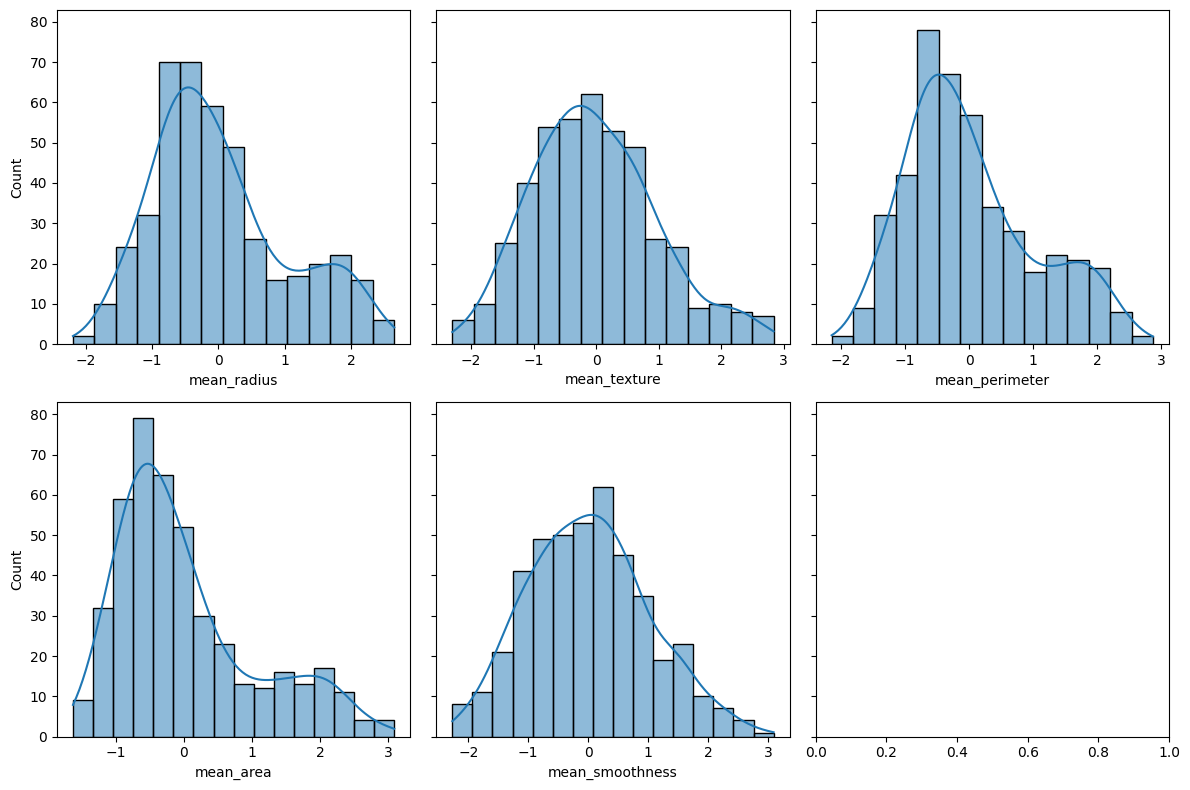

In [ ]:
#For each feature/column in the training , Plot the histogram/distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.histplot(train, ax=axes[0, 0], x="mean_radius", kde=True)
sns.histplot(train, ax=axes[0, 1], x="mean_texture", kde=True)
sns.histplot(train, ax=axes[0, 2], x="mean_perimeter" , kde=True)
sns.histplot(train, ax=axes[1, 0], x="mean_area", kde=True)
sns.histplot(train, ax=axes[1, 1], x="mean_smoothness", kde=True)

plt.tight_layout()
plt.show()
#The histograms appears to be roughly symmetric and bell-shaped, which suggests that the data may be normally distributed

# **Hypothesis Test**

In [ ]:
from scipy.stats import shapiro

alpha = 0.05  # Set the significance level

for feature in data.columns:
    statistic, p_value = shapiro(data[feature])
    if ((p_value > alpha) | (p_value < 1 - alpha)):
        print(f"The {feature} feature/column is normally distributed (fail to reject H0)")
    else:
        print(f"The {feature} feature/column is not normally distributed (reject H0)")

The mean_radius feature/column is normally distributed (fail to reject H0)
The mean_texture feature/column is normally distributed (fail to reject H0)
The mean_perimeter feature/column is normally distributed (fail to reject H0)
The mean_area feature/column is normally distributed (fail to reject H0)
The mean_smoothness feature/column is normally distributed (fail to reject H0)
The diagnosis feature/column is normally distributed (fail to reject H0)


# Plot Conditional Distributions

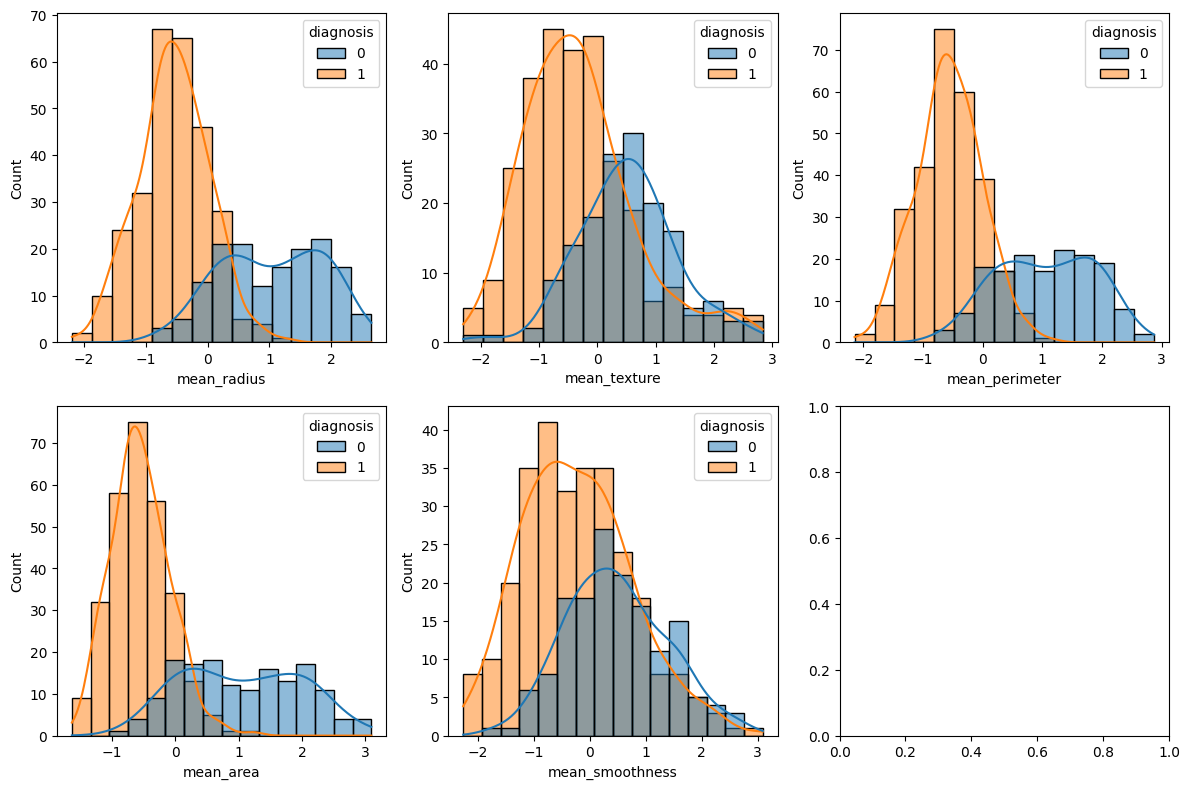

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot conditional distributions for each feature on the target class
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(data=train, x="mean_radius", hue="diagnosis", kde=True, ax=axes[0, 0])
sns.histplot(data=train, x="mean_texture", hue="diagnosis", kde=True, ax=axes[0, 1])
sns.histplot(data=train, x="mean_perimeter", hue="diagnosis", kde=True, ax=axes[0, 2])
sns.histplot(data=train, x="mean_area", hue="diagnosis", kde=True, ax=axes[1, 0])
sns.histplot(data=train, x="mean_smoothness", hue="diagnosis", kde=True, ax=axes[1, 1])

# Adjust the layout
#function call adjusts the spacing between subplots to improve their readability.
plt.tight_layout()

# Display the plots
plt.show()


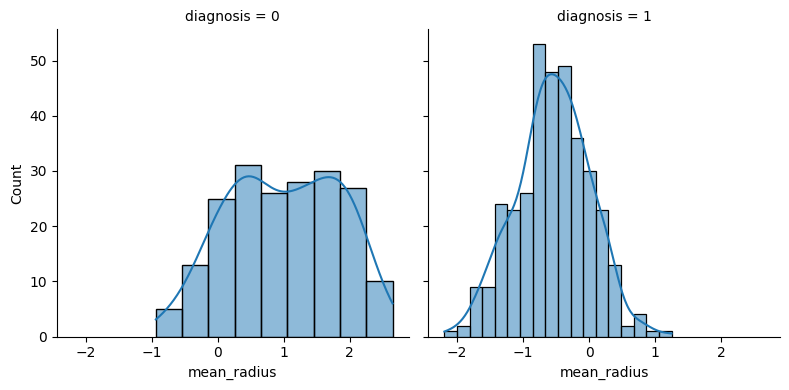

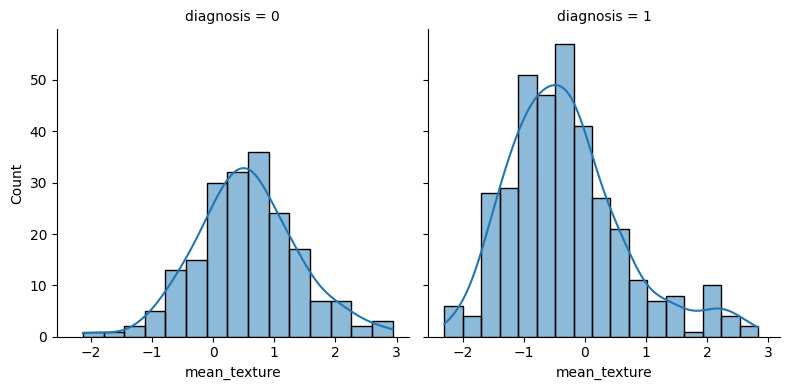

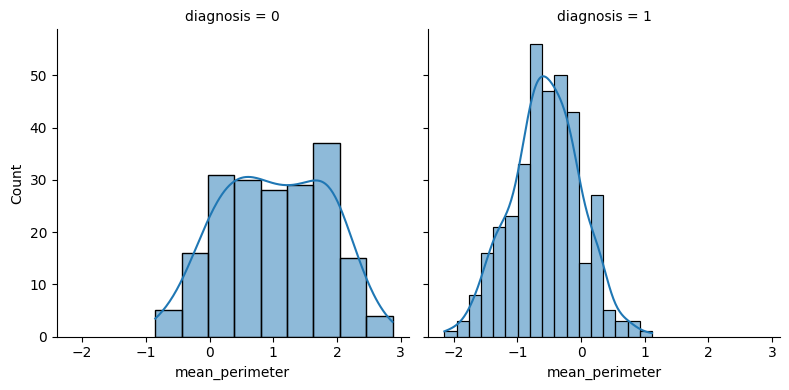

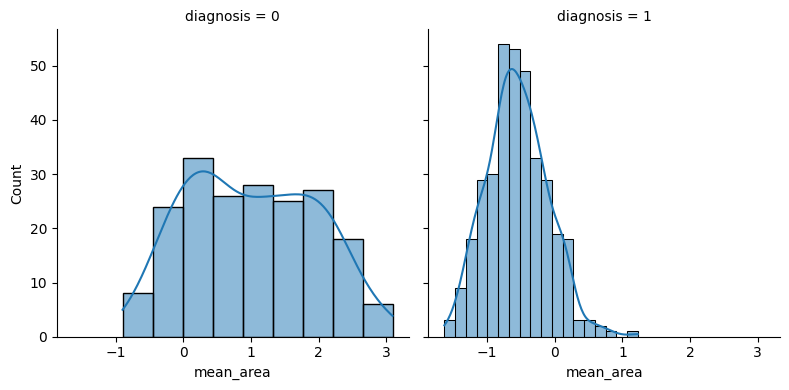

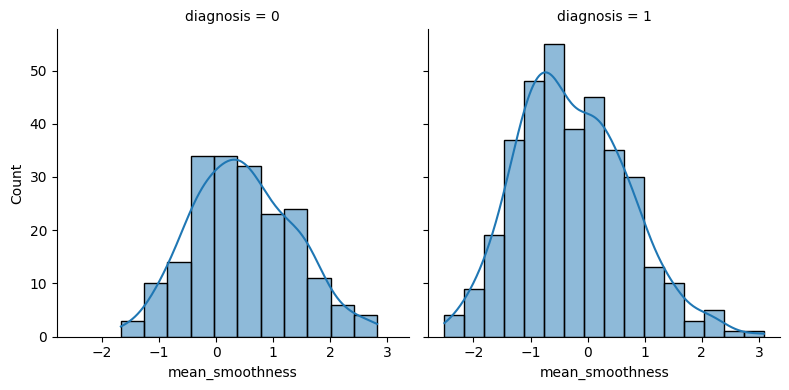

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conditional_distributions(train, feature):
    """
    Plot conditional distributions of a feature based on the diagnosis (label).

    Parameters:
    - data: DataFrame containing the data
    - feature: Name of the feature to plot
    """
    g = sns.FacetGrid(data, col="diagnosis", height=4)
    g.map(sns.histplot, feature, kde=True)
    plt.show()

# List of features to plot
features = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]

# Plot conditional distributions for each feature
for feature in features:
    plot_conditional_distributions(train, feature)


# Naive Bayes Classifier formula can be written based on Bayes theorem as:

# $P(y|x_1, \ldots, x_j) = \frac{P(x_1, \ldots, x_j|y) \cdot P(y)}{P(x_1, \ldots, x_j)}$

### where $y$ represents the dependent variable, and $x_1, \ldots, x_j$ represent the independent features.

### $-P(y|x_1, \ldots, x_j)$ is the posterior probability of $y$ given the features $x_1, \ldots, x_j$.

### $-P(x_1, \ldots, x_j|y)$ is the likelihood of observing the features $x_1, \ldots, x_j$ given that the class is $y$.

### $-P(y)$ is the prior probability of $y$.

### $-P(x_1, \ldots, x_j)$ is the marginal probability of observing the features $x_1, \ldots, x_j$.

In [ ]:
# Calculate P(Y=y) for all possible y
'''Calculate Prior Probabilities for Each Class
This function calculates the prior probabilities for each class (Y=y) in the given dataset (df) based on a target variable (Y).
It takes two parameters: df - the dataset, and Y - the name of the target variable.
The function first identifies all unique classes in the target variable and sorts them in ascending order.
It then iterates over each class and calculates the prior probability by dividing the count of instances with that class by the total number of instances in the dataset.
The prior probabilities are stored in a list and returned by the function.'''


def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
# P(X=x|Y=y) using Gaussian dist.
""" Calculate Likelihood Probability for Gaussian Distribution

 This function calculates the likelihood probability for a given feature value (feat_val) of a specific feature (feat_name) in a Gaussian distribution, conditioned on a target variable (Y) having a specific label.
 It takes five parameters: df - the dataset, feat_name - the name of the feature, feat_val - the value of the feature, Y - the name of the target variable, and label - the specific label of the target variable.
 The function first retrieves the column names of the dataset.
 It then filters the dataset to include only the instances where the target variable has the specified label.
 Next, it calculates the mean and standard deviation of the feature within the filtered dataset.
 Using these parameters, the function calculates the likelihood probability using the Gaussian probability density function formula."""

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
#P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y)
"""# Naive Bayes Classifier with Gaussian Distribution

 This function implements the Naive Bayes classifier using the Gaussian distribution assumption for the feature variables.
 It takes three parameters: df - the dataset, X - the input features to classify, and Y - the target variable.
 The function starts by extracting the feature names from the dataset.
 It then calculates the prior probabilities for each class using the calculate_prior() function.
 Next, it iterates over each input sample (x) and performs the following steps:
 - Calculates the likelihood probabilities for each class using the calculate_likelihood_gaussian() function.
 - Initializes a list to store the posterior probabilities (numerator only).
 - For each class, multiplies the corresponding likelihood probabilities by the prior probability to calculate the posterior probability numerator.
 - Appends the predicted class (index with the maximum posterior probability) to the list of predicted labels (Y_pred)."""

def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
# Test Gaussian model
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[32  7]
 [ 0 71]]
0.953020134228188


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [ ]:
#comparison
#here we can deduce a difference of 2.47% difference between the 2 accuracies in favor of the last one
